# Predict whether a passenger of titanic survived or not

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
titanic = sns.load_dataset('titanic')
titanic = titanic.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'])

titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic.dropna(inplace=True)

titanic.head()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_12176\1096182185.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
X = titanic.drop('survived',axis=1)
y = titanic['survived']

In [34]:
numerical_cols = ['age', 'sibsp', 'parch', 'fare']
categorical_cols = ['sex', 'embarked', 'pclass']

preprocessor = make_column_transformer(
    (StandardScaler(), numerical_cols),
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols)
)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [35]:
tf.random.set_seed(42)

model = Sequential(
    [
        Dense(100,activation='relu'),
        Dense(10,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

early_stopping = EarlyStopping(monitor='val_loss',patience=50,restore_best_weights=True)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_2 = model.fit(X_train, y_train,validation_split=0.2,epochs=500,callbacks=[early_stopping],verbose=0)

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nModel Accuracy: {accuracy*100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8034 - loss: 0.4569 

Model Accuracy: 80.34%


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


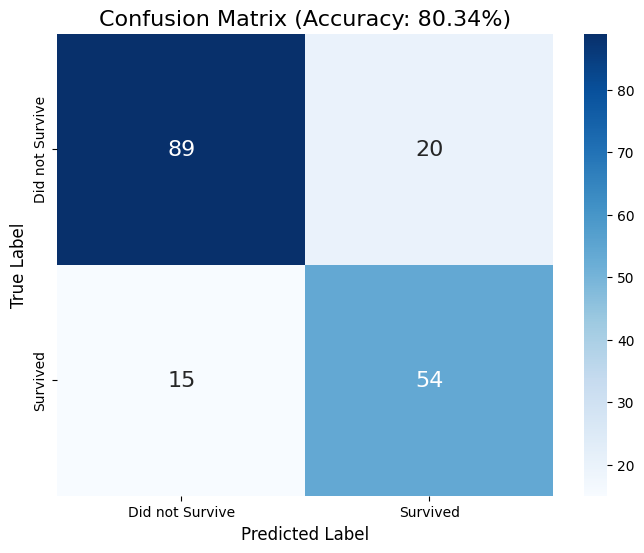

In [43]:
from sklearn.metrics import accuracy_score

y_pred_probs = model.predict(X_test)
y_pred = np.round(y_pred_probs).flatten()
y_test_flat = y_test 


accuracy = accuracy_score(y_test_flat, y_pred)


plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_flat, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did not Survive', 'Survived'],
            yticklabels=['Did not Survive', 'Survived'],
            annot_kws={"size": 16})

plt.title(f'Confusion Matrix (Accuracy: {accuracy*100:.2f}%)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()
